# Simple test of using ROOT in a Python notebook

Trying to read and process some data from a ROOT file over the network. Using material from
* [Example of a Z Analysis ROOT C++ kernel](http://nbviewer.jupyter.org/github/artfisica/rootbinder/blob/master/notebooks/SummerStudents/ATLAS_Open_Data_Z_Analysis_v0-0-1b.ipynb)
* [ROOT reference guide](https://root.cern.ch/doc/master/index.html)

Import the usual Matplotlib stuff for plotting histograms etc.

In [1]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = 12,8

Import whatever classes we need from ROOT:

In [2]:
from ROOT import TChain, TFile

Welcome to ROOTaaS 6.06/06


Create a "chain" of files (but just one file for now):

In [3]:
data = TChain("mini");  # "mini" is the name of the TTree stored in the data files
data.Add("http://atlas-opendata.web.cern.ch/atlas-opendata/release/samples/Data/DataMuons.root")

1

Count the number of events in the data:

In [4]:
n_events = data.GetEntries()
print(n_events)

7028084


This is the list of "leaves" in the "tree", corresponding to bits of data stored for each event:

In [5]:
leaves = data.GetListOfLeaves()
for branch in leaves:
    print branch.GetName()

runNumber
eventNumber
channelNumber
mcWeight
pvxp_n
vxp_z
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_BTAG
scaleFactor_TRIGGER
scaleFactor_JVFSF
scaleFactor_ZVERTEX
trigE
trigM
passGRL
hasGoodVertex
lep_n
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_flag
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_n
alljet_n
jet_pt
jet_eta
jet_phi
jet_E
jet_m
jet_jvf
jet_trueflav
jet_truthMatched
jet_SV0
jet_MV1


This is how to read the first event into memory:

In [6]:
data.GetEntry(0)

127

Let's look at some of the data from the first event. There is a list of [variable names](https://cheatham1.gitbooks.io/app-analyser/content/variable_names.html) in the ATLAS Open Data documentation on the web. It doesn't state the units used, but it looks like momenta are in MeV. The names on the web also don't always match exactly the names in the data, so a bit of guesswork is required!

In [7]:
num_leptons = data.lep_n        # number of identified leptons in the event
pt_lepton = data.lep_pt[0]      # transverse momentum of the first lepton
print("Number of leptons = {}".format(num_leptons))
print("Pt of first lepton = {}".format(pt_lepton))

Number of leptons = 1
Pt of first lepton = 40531.8554688


Let's construct a histogram of the missing transverse energy in each event, but just the first 1000 events for now so we're not waiting too long:

In [8]:
met = []
for event_num in xrange(1000):
    data.GetEntry(event_num)
    met.append(data.met_et)

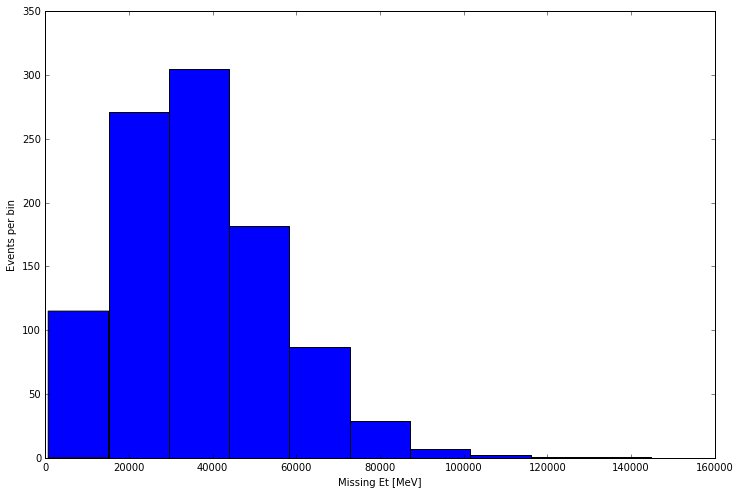

In [9]:
plt.hist(met)
plt.xlabel('Missing Et [MeV]')
plt.ylabel('Events per bin')